In [1]:
# Examine wind stress diagnostics
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, sys
sys.path.append(os.path.abspath('/work/oceans/wbao/MITgcm_results/jorgemontt'))

In [ ]:

#input_file = '/work/oceans/wbao/MITgcm_results/jorgemontt/2_Qsg150_Wind/WindStress0_004.nc'
#file0 = xr.open_dataset(input_file)
## removed duplicated data caused by model restart
#ws = file0.isel(T=~file0.get_index("T").duplicated())
taum = [-0.4, -0.2, 0.2, 0.4, 0] # maximum wind stress for case 001-004


#state = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/2_Qsg150_Wind/state0_005.nc')
state = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/Qsg150_wind/state0_004.nc')
u = state.U.data
time = state.T.data / 3600

In [ ]:
nwstate = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/2_Qsg_case/state_ext_003.nc')
nwu = nwstate.U.data
nwtime = nwstate.T.data/3600

In [2]:
#ws_diag = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/2_Qsg150_Wind/WindStress0_005.nc')
ws_diag1 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/Qsg150_wind/WindStress_001.nc')

zonal1 = ws_diag1.oceTAUX.data 
merid1 = ws_diag1.oceTAUY.data
hour1 = ws_diag1.T.data / 3600

ws_diag2 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/Qsg150_wind/WindStress_005.nc')

zonal2 = ws_diag2.oceTAUX.data 
merid2 = ws_diag2.oceTAUY.data
hour2 = ws_diag2.T.data / 3600

In [3]:
hour1, hour2

(array([1446., 1452., 1458., 1464., 1470., 1476., 1482., 1488., 1494.,
        1500., 1506., 1512., 1518., 1524., 1530., 1536., 1542., 1548.,
        1554., 1560., 1566., 1572., 1578., 1584., 1590., 1596., 1602.,
        1608., 1614., 1620., 1626., 1632., 1638., 1644., 1650., 1656.,
        1662., 1668., 1674., 1680., 1686., 1692., 1698., 1704., 1710.,
        1716., 1722., 1728., 1734., 1740., 1746., 1752., 1758., 1764.,
        1770., 1776., 1782., 1788., 1794., 1800., 1806., 1812., 1818.,
        1824., 1830., 1836., 1842., 1848., 1854., 1860., 1866., 1872.,
        1878., 1884., 1890., 1896., 1902., 1908., 1914., 1920., 1926.,
        1932., 1938., 1944., 1950., 1956., 1962., 1968., 1974., 1980.,
        1986., 1992., 1998., 2004., 2010., 2016., 2022., 2028., 2034.,
        2040., 2046., 2052., 2058., 2064., 2070., 2076., 2082., 2088.,
        2094., 2100., 2106., 2112., 2118., 2124., 2130., 2136., 2142.,
        2148., 2154., 2160.]),
 array([1446., 1452., 1458., 1464., 1470., 147

In [ ]:
zonal.max(), merid.max()

In [8]:
zonal1[-2,0,40,40], zonal2[-2,0,40,40]

(0.0, 0.0)

Text(0, 0.5, 'Wind stress')

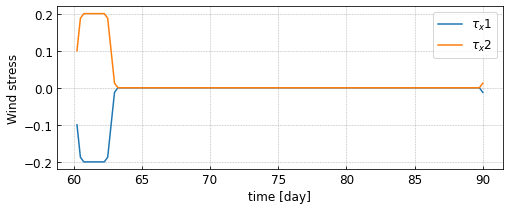

In [4]:
fig0 = plt.figure(figsize=(8,3))    
ax1 = fig0.add_subplot(111)

ax1.plot(hour1/24,zonal1[:,0,40,40],'-',label=r'$\tau_x1$')
ax1.plot(hour2/24,zonal2[:,0,40,40],'-',label=r'$\tau_x2$')
#ax1.plot(hour/24,merid[:,0,40,40],'-',label=r'$\tau_y$')
ax1.legend(loc='best',fontsize=12)
plt.grid(linestyle = '--', linewidth = 0.5)
#ax1.set_ylim([0, 4e9])
#ax1.set_xticks([0.04, 0.06, 0.08, 0.10, 0.12])
ax1.tick_params(direction='in', labelsize=12)
ax1.set_xlabel(r'time [day]',fontsize=12)
ax1.set_ylabel(r'Wind stress',fontsize=12)


In [ ]:
u[:,1,40,40], nwu[0::2,1,40,40]

In [ ]:
fig1 = plt.figure(figsize=(8,3))    
ax1 = fig1.add_subplot(111)

ax1.plot(time/24,u[:,1,40,40],'-',label=r'wind')
u1 = nwu[:200,1,40,40]
time1 = nwtime[:200]
ax1.plot(time1[0::2]/24,u1[0::2],'-',label=r'no-wind')
ax1.legend(loc='best',fontsize=12)
plt.grid(linestyle = '--', linewidth = 0.5)
#ax1.set_ylim([0, 4e9])
#ax1.set_xticks([0.04, 0.06, 0.08, 0.10, 0.12])
ax1.tick_params(direction='in', labelsize=12)
ax1.set_xlabel(r'time [hour]',fontsize=12)
ax1.set_ylabel(r'U',fontsize=12)

In [ ]:
Area = np.empty([90, 10]) # Cross Y direction
Area[:20, :] = 400
Area[20:50, :] = 800
Area[50:, :] = 1200

Q1 = np.empty(len(time))
Q2 = np.empty(len(time))
for i in range(len(time)):
    Q = u[i,:,35:45,40] * Area
    Q1[i] = Q[Q > 0].sum()
    Q2[i] = Q[Q < 0].sum()
    
nwQ1 = np.empty(len(nwtime))
nwQ2 = np.empty(len(nwtime))
for i in range(len(nwtime)):
    Q = nwu[i,:,35:45,40] * Area
    nwQ1[i] = Q[Q > 0].sum()
    nwQ2[i] = Q[Q < 0].sum()

In [ ]:
np.mean(Q1+Q2), np.mean(nwQ1+nwQ2)

In [ ]:
fig2 = plt.figure(figsize=(8,3))    
ax1 = fig2.add_subplot(111)

ax1.plot(time/24,Q2,'-',label=r'Q1')
ax1.plot(nwtime[:200]/24,nwQ2[:200],'-',label=r'no-wind')
# ax1.plot(time/24,Q2,'-',label=r'Q2')
#ax1.plot(time/24,Q1+Q2,'-',label=r'Q_net')
#ax1.plot(nwtime[:300]/24,nwQ1[:300]+nwQ2[:300],'-',label=r'Q_net')
ax1.legend(loc='best',fontsize=12)
plt.grid(linestyle = '--', linewidth = 0.5)
#ax1.set_ylim([0, 4e9])
#ax1.set_xticks([0.04, 0.06, 0.08, 0.10, 0.12])
ax1.tick_params(direction='in', labelsize=12)
ax1.set_xlabel(r'time [day]',fontsize=12)
ax1.set_ylabel(r'Volume flux',fontsize=12)